In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
datos = datasets.load_iris()

In [3]:
X = datos.data
Y = datos.target

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
sc = StandardScaler()

In [6]:
# Estandarización de los datos
X = sc.fit_transform(X)

In [7]:
X.max()

3.0907752482994253

In [8]:
# Matriz de pesos
ancho = 20
CARACTERISTICAS = 4
np.random.seed(0)
#el 4 por el número de características
W = np.random.standard_normal(ancho*ancho*CARACTERISTICAS).reshape(ancho, ancho, CARACTERISTICAS)

In [9]:
W.shape

(20, 20, 4)

In [10]:
W[0,0,:]

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


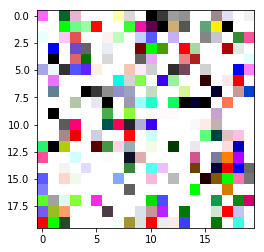

In [11]:
plt.imshow(W)

In [12]:
def euclidiana (a, b):
    return ((a-b)**2).sum()**0.5

In [13]:
def ganadora (W, ancho, X):
    winner = euclidiana(X, W[0,0])
    ii = 0
    jj = 0
    
    for i in range(ancho):
        for j in range(ancho):
            tmp = euclidiana(W[i, j], X)
            
            if(tmp < winner):
                winner = tmp
                ii = i
                jj = j
    
    return ii, jj, winner
    

In [14]:
ii, jj, ww = ganadora(W, ancho, X[0])

In [15]:
[ii, jj, ww]

[2, 1, 0.5515100914445962]

In [16]:
def entrenamiento(W, ancho, ii, jj, x, vecindad=3, n=0.5):
    for i in np.arange(ii-vecindad, ii+vecindad+1):
        for j in np.arange(jj-vecindad, jj+vecindad+1):
            if( i >= 0 and i < ancho and j >= 0 and j < ancho):
                manhatan = np.abs(ii-i) + np.abs(jj-j)
                W[i,j] += n * 1.0/(1+manhatan) * (x-W[i,j])
                
    return W
    

In [21]:
# Entrenamiento
for i in range(10000):
    indx = np.random.randint(150)

    ii, jj, ganador = ganadora(W, ancho, X[indx])
    W = entrenamiento(W, ancho, ii, jj, X[indx], 5, 0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


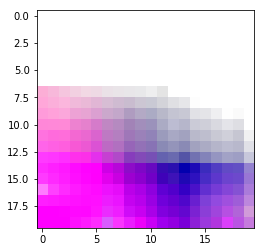

In [22]:
plt.imshow(W)

In [23]:
np.max(W)

2.745468266366494

In [24]:
np.min(W)

-1.6147976671629853

In [25]:
minMaxS = MinMaxScaler()

In [26]:
tmp = minMaxS.fit_transform(W.reshape(ancho*ancho*CARACTERISTICAS, 1))

In [27]:
tmp.shape

(1600, 1)

In [28]:
ww = tmp.reshape(ancho, ancho, CARACTERISTICAS)

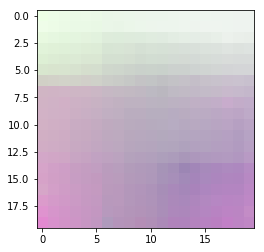

In [29]:
plt.imshow(ww)

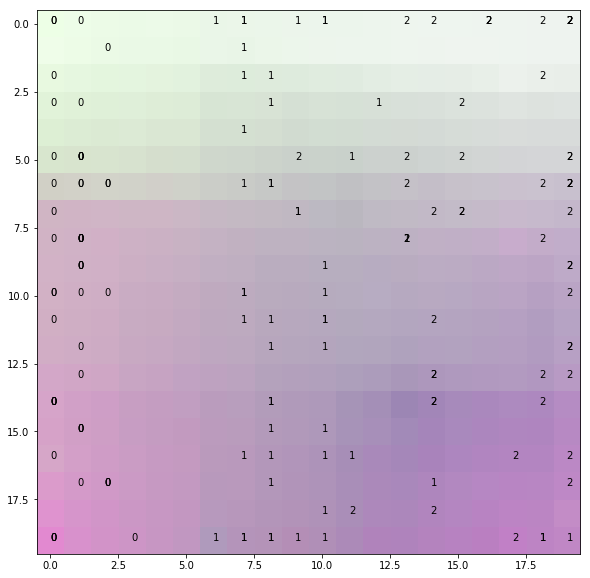

In [30]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.imshow(ww)
for i in np.arange(0, 150):
    ii, jj, dd = ganadora(W, ancho, X[i])
    plt.text(ii,jj, Y[i])
